In [1]:
import pandas as pd
# Import the Excel file
excel_file = 'subsurface.xlsx'  # Replace with the path and filename of your Excel file
df = pd.read_excel(excel_file)

In [2]:
df

,boro_cd,density_of_PLUTO,area_from_LION,subsurface_density1,subsurface_density*10000000
0,105,12.502300,4.379004e+07,2.855056e-07,2.855056
1,106,6.746790,3.873004e+07,1.742004e-07,1.742004
2,101,6.099960,4.168665e+07,1.463289e-07,1.463289
3,102,4.739980,3.760493e+07,1.260468e-07,1.260468
4,108,5.743260,5.521503e+07,1.040162e-07,1.040162
...,...,...,...,...,...
66,595,0.010432,5.453205e+07,1.913058e-10,0.001913
67,482,0.002735,2.425802e+07,1.127338e-10,0.001127
68,226,0.002176,5.056580e+07,4.303086e-11,0.000430
69,228,0.002540,9.293810e+07,2.733314e-11,0.000273


In [3]:
from sklearn.preprocessing import StandardScaler

column_name = 'subsurface_density1'

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the column
df['subsurface_density'] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))


In [4]:
column_name = 'density_of_PLUTO'

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the column
df['surface_density'] = scaler.fit_transform(df[column_name].values.reshape(-1, 1))
df['subsurface_density*30000000']=df['subsurface_density1']*30000000

In [5]:
df

,boro_cd,density_of_PLUTO,area_from_LION,subsurface_density1,subsurface_density*10000000,subsurface_density,surface_density,subsurface_density*30000000
0,105,12.502300,4.379004e+07,2.855056e-07,2.855056,5.500376,5.617663,8.565167
1,106,6.746790,3.873004e+07,1.742004e-07,1.742004,3.126640,2.669226,5.226013
2,101,6.099960,4.168665e+07,1.463289e-07,1.463289,2.532241,2.337868,4.389866
3,102,4.739980,3.760493e+07,1.260468e-07,1.260468,2.099697,1.641176,3.781403
4,108,5.743260,5.521503e+07,1.040162e-07,1.040162,1.629866,2.155137,3.120487
...,...,...,...,...,...,...,...,...
66,595,0.010432,5.453205e+07,1.913058e-10,0.001913,-0.584344,-0.781679,0.005739
67,482,0.002735,2.425802e+07,1.127338e-10,0.001127,-0.586019,-0.785623,0.003382
68,226,0.002176,5.056580e+07,4.303086e-11,0.000430,-0.587506,-0.785909,0.001291
69,228,0.002540,9.293810e+07,2.733314e-11,0.000273,-0.587841,-0.785722,0.000820


In [6]:
df.set_index('boro_cd', inplace=True)

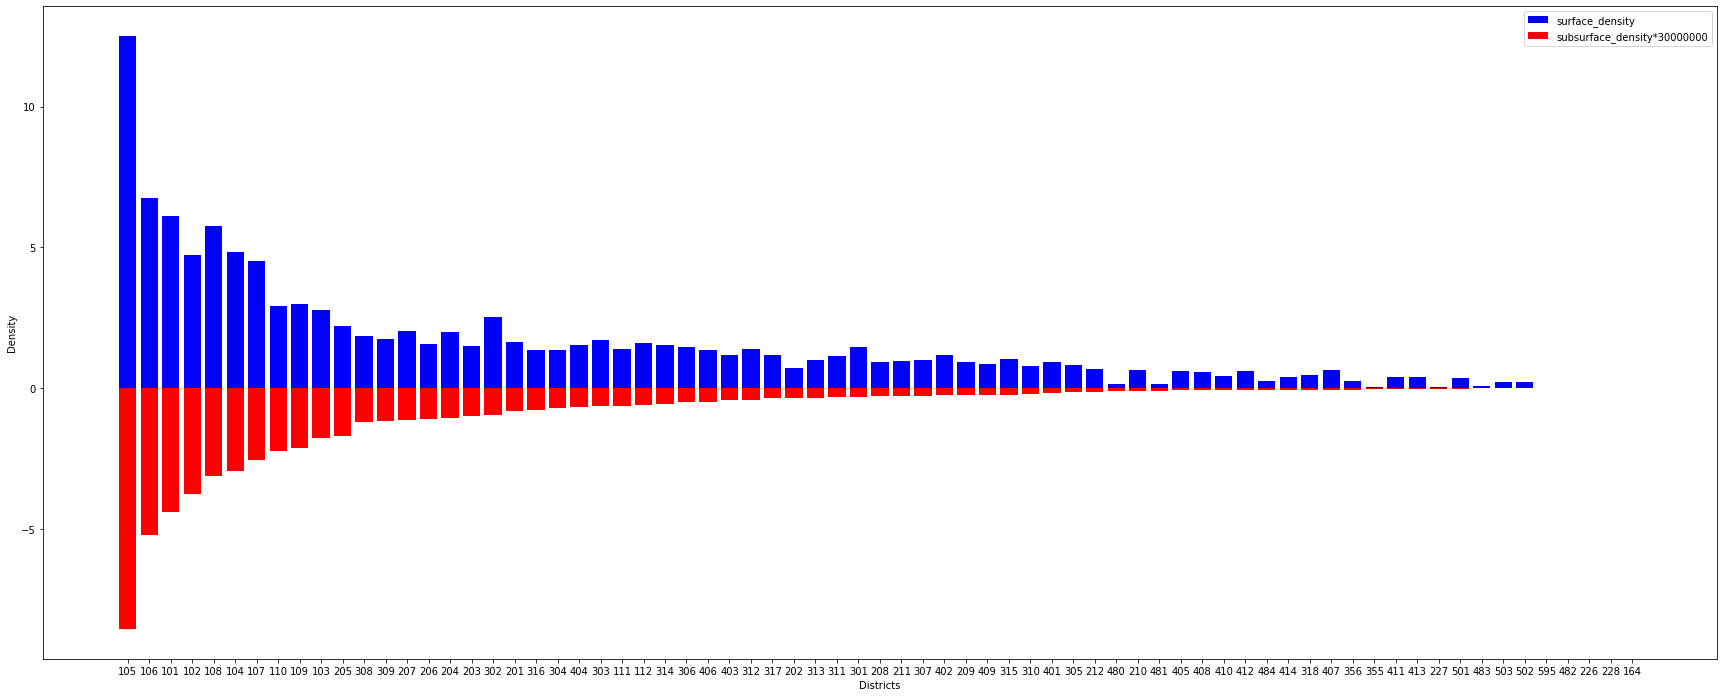

In [7]:
import matplotlib.pyplot as plt
import numpy as np
columns_to_plot = ['density_of_PLUTO', 'subsurface_density*30000000']
# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_plot]
plt.figure(figsize=(30, 12))

bar_width = 0.35

bar_positions = np.arange(len(df_selected['density_of_PLUTO']))

plt.bar(bar_positions, df_selected['density_of_PLUTO'], color='blue', label='surface_density')
plt.bar(bar_positions, -df_selected ['subsurface_density*30000000'], color='red', label='subsurface_density*30000000')
# Set the labels for x-axis and y-axis
plt.xticks(bar_positions, df.index)
plt.xlabel('Districts')
plt.ylabel('Density')

# Add a legend
plt.legend()
plt.savefig('surface_and_subsurface_plot.jpg')
plt.show()

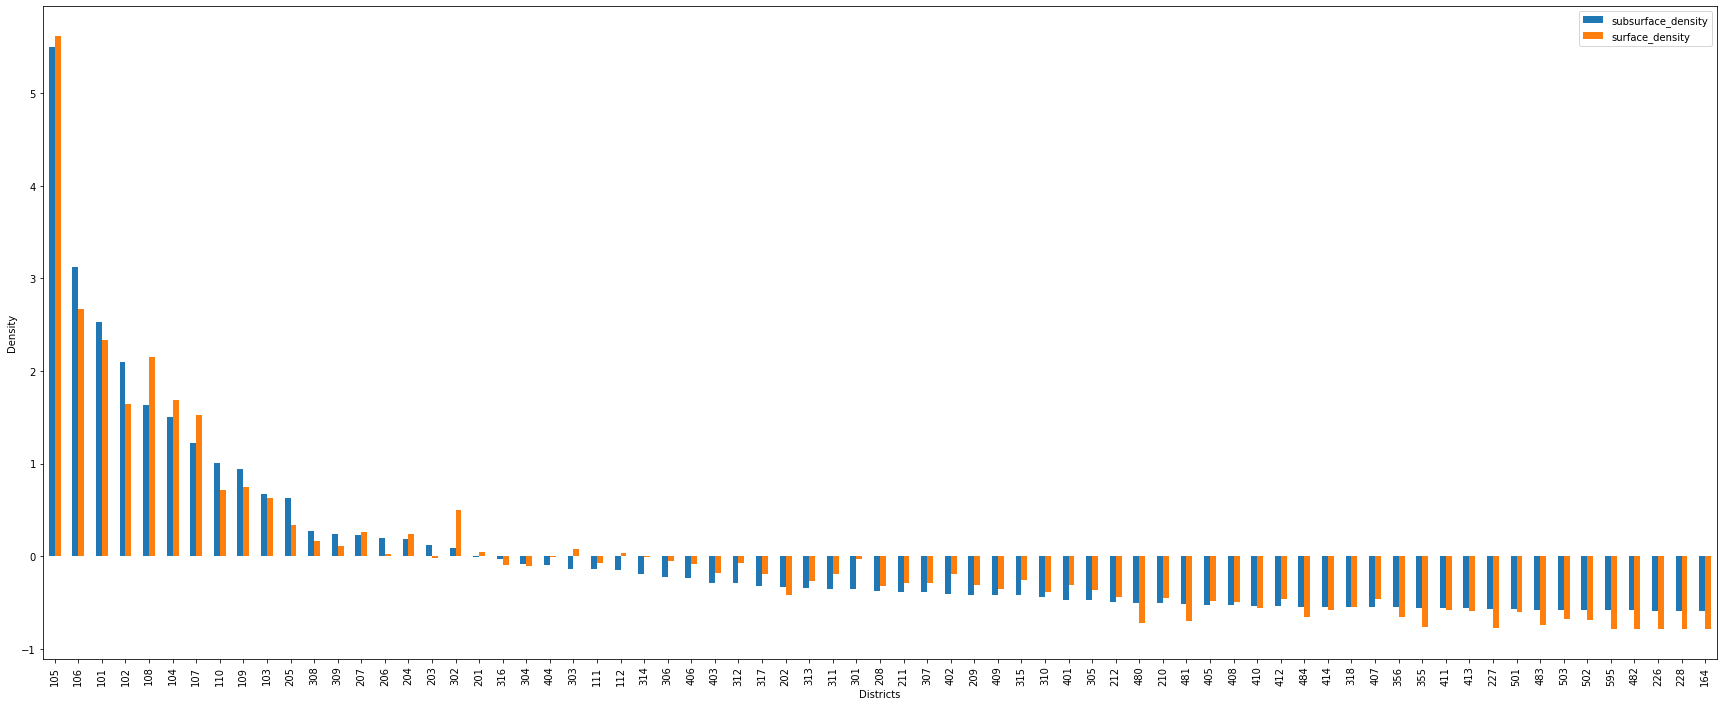

In [8]:
import matplotlib.pyplot as plt
columns_to_plot = ['subsurface_density', 'surface_density']

fig, ax = plt.subplots(figsize=(30, 12))
# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_plot]

# Plot the bar chart
df_selected.plot(kind='bar', ax=ax)

# Set the labels for x-axis and y-axis
plt.xlabel('Districts')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot

plt.savefig('surface_and_subsurface_plot_standarlized.jpg')
plt.show()

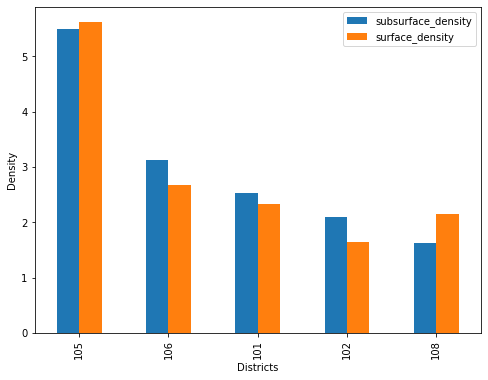

In [9]:
# Assuming your DataFrame is named 'df' and the columns you want to plot are 'Column1' and 'Column2'
columns_to_plot = ['subsurface_density', 'surface_density']
num_rows_to_plot = 5  # Number of rows to plot

# Create a new DataFrame with only the selected columns and the first few rows
df_selected = df[columns_to_plot].head(num_rows_to_plot)

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as per your requirements

# Plot the bar chart
df_selected.plot(kind='bar', ax=ax)

# Set the labels for x-axis and y-axis
plt.xlabel('Districts')
plt.ylabel('Density')

# Add a legend
plt.legend()
plt.savefig('top.jpg')
# Show the plot
plt.show()

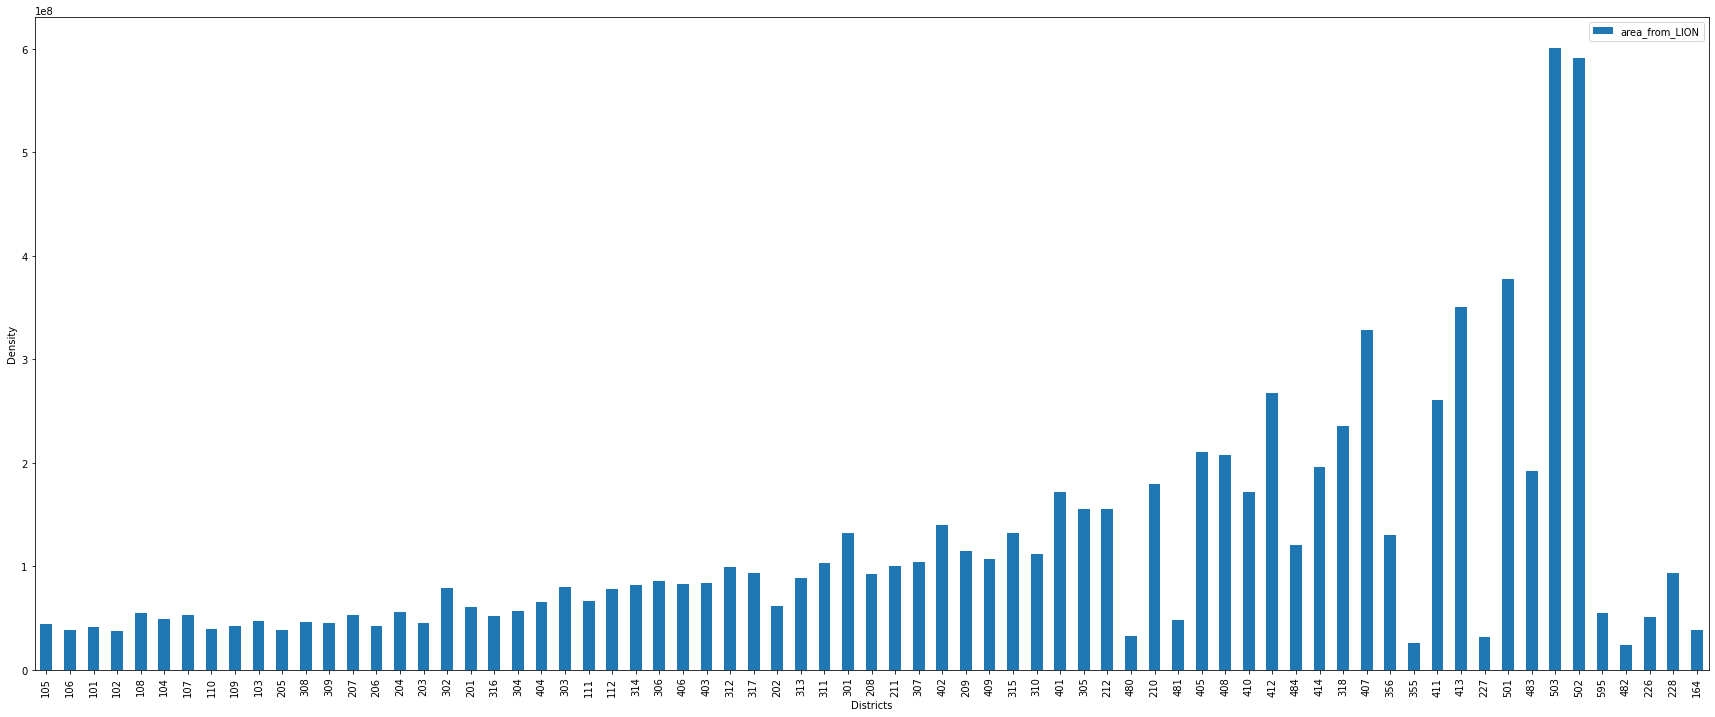

In [10]:
import matplotlib.pyplot as plt
columns_to_plot = ['area_from_LION']

fig, ax = plt.subplots(figsize=(30, 12))
# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_plot]

# Plot the bar chart
df_selected.plot(kind='bar', ax=ax)

# Set the labels for x-axis and y-axis
plt.xlabel('Districts')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot

plt.savefig('road_AERA.jpg')
plt.show()

In [11]:
df

,density_of_PLUTO,area_from_LION,subsurface_density1,subsurface_density*10000000,subsurface_density,surface_density,subsurface_density*30000000
boro_cd,,,,,,,
105,12.502300,4.379004e+07,2.855056e-07,2.855056,5.500376,5.617663,8.565167
106,6.746790,3.873004e+07,1.742004e-07,1.742004,3.126640,2.669226,5.226013
101,6.099960,4.168665e+07,1.463289e-07,1.463289,2.532241,2.337868,4.389866
102,4.739980,3.760493e+07,1.260468e-07,1.260468,2.099697,1.641176,3.781403
108,5.743260,5.521503e+07,1.040162e-07,1.040162,1.629866,2.155137,3.120487
...,...,...,...,...,...,...,...
595,0.010432,5.453205e+07,1.913058e-10,0.001913,-0.584344,-0.781679,0.005739
482,0.002735,2.425802e+07,1.127338e-10,0.001127,-0.586019,-0.785623,0.003382
226,0.002176,5.056580e+07,4.303086e-11,0.000430,-0.587506,-0.785909,0.001291


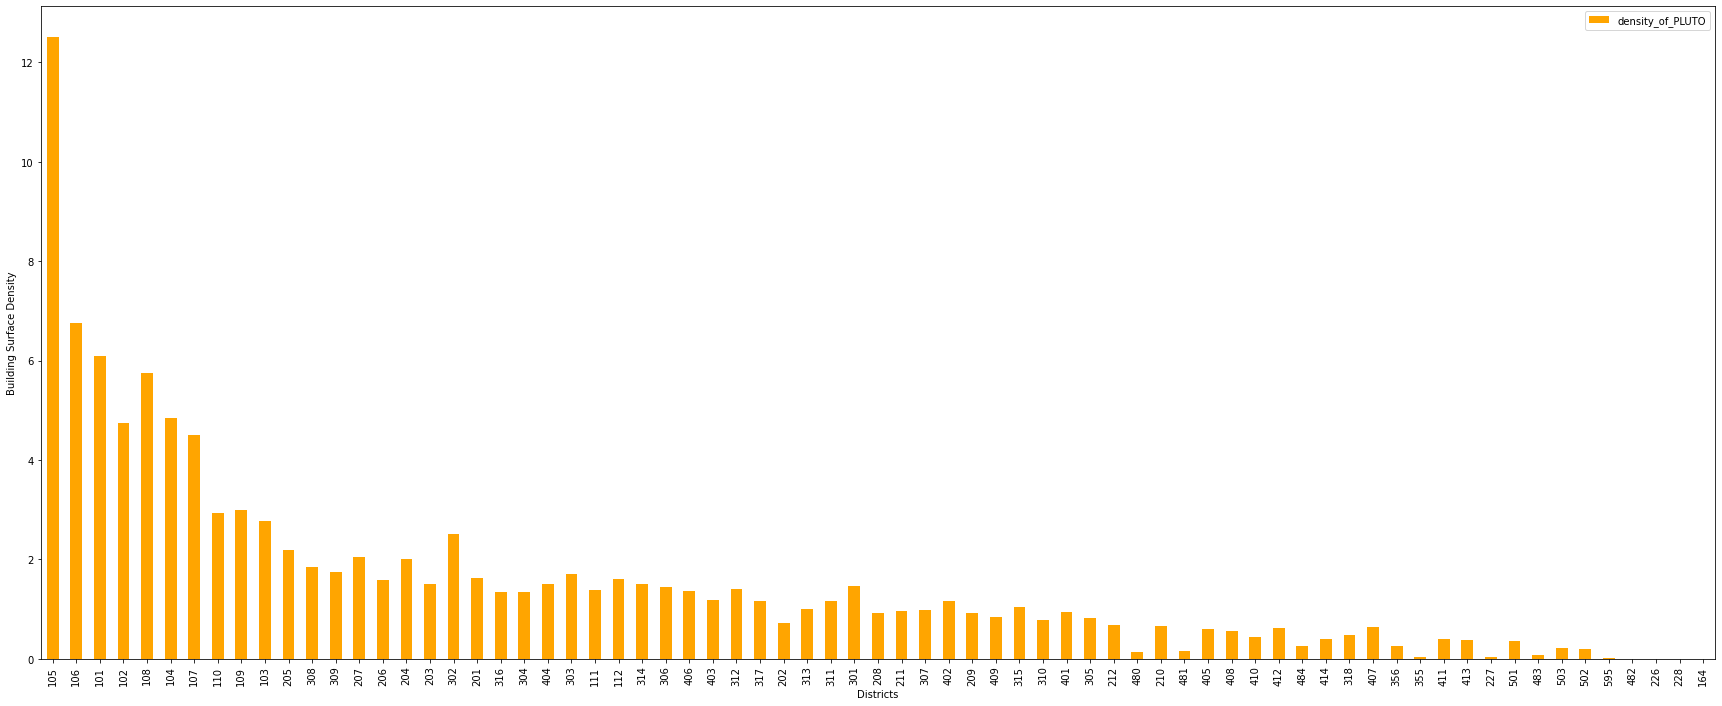

In [12]:
import matplotlib.pyplot as plt
columns_to_plot = ['density_of_PLUTO']

fig, ax = plt.subplots(figsize=(30, 12))
# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_plot]

# Plot the bar chart
df_selected.plot(kind='bar', ax=ax,color='orange')

# Set the labels for x-axis and y-axis
plt.xlabel('Districts')
plt.ylabel('Building Surface Density')

# Add a legend
plt.legend()

# Show the plot

plt.savefig('building_density.jpg')
plt.show()